## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio

## Unary Code

In [2]:
def unary_encode(n):
    unary = []
    for i in range(n):
        unary.append(1) # add ones
    unary.append(0) # add a zero
    return unary

def unary_decode(unary):
    return len(unary) - 1

## Binary Code

In [3]:
def app_zero(ls, l):
    '''
    This function append zeros to the begining of the list
    
    Parameter:
    -------------
    
    ls: (list) list that we want to modify
    
    l: (int) new length of list
    
    Returns:
    -------------
    
    out: (list) a list with length l
    '''
    
    if len(ls) > l:
        raise Execption("Length of list most bigger than l!!!")
    elif len(ls) == l:
        return ls
    else:
        x = l - len(ls)
        ap = [0]*x
        return ap + ls

def binary_encode(m, r):
    
    k = np.log2(m) # calculate k
    
    if k == int(k): # if m=2^k 
        binary = list(map(int, list(bin(r)[2:]))) # get binary form of r
        return app_zero(binary, int(k)) # return list with length k
    
    # if k not equals 2^m
    c = int(2**np.ceil(k) - m)
    k = int(np.ceil(k))
    # calculate truncated r
    if 0 <= r < c:
        # code r with k-1 bits
        return app_zero(list(map(int, list(bin(r)[2:]))), k-1)
    else:
        # code r+c with k bits
        return app_zero(list(map(int, list(bin(r+c)[2:]))), k)


def binary_decode(m, binary):
    
    k = np.log2(m) # calculate k
    binary = ''.join(list(map(str, binary)))
    
    if k == int(k): # if m=2^k
        return int(binary, 2)
    
    r_trunc = int(binary, 2) # calculate truncated r
    c = int(2**np.ceil(k) - m)
    if 0 <= r_trunc < c:
        return r_trunc
    else:
        return r_trunc - c

## Golomb Code

In [4]:
def golomb_encode(n, m):
    '''
    This function applys golomb code to a number
    
    Parameters:
    -------------
    
    n: (int) number we want to code
    
    m: (int) parameter of golomb code
    
    Returns:
    -------------
    
    code: (list) a list of 0s and 1s which is golomb code of n
    '''
    q = n // m # calcuate quotient
    r = n % m # calculate reminder
    unary = unary_encode(q) # unary code for q
    binary = binary_encode(m, r) # binary code for r
    return unary + binary # return concat of codes


def golomb_decode(code, m):
    '''
    This function decode the golomb coded list
    
    Parameters:
    -------------
    
    code: (list) list of golomb code
    
    m: (int) parameter of golomb code
    
    Returns:
    -------------
    
    n: (int) number that was coded
    '''
    
    ind = code.index(0)
    unary = code[0:ind+1]
    binary = code[ind+1:]
    
    q = unary_decode(unary)
    r = binary_decode(m, binary)
    
    return q*m+r

## Test on Random Image

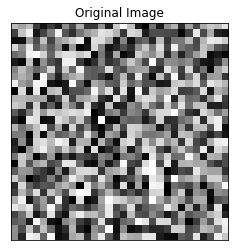

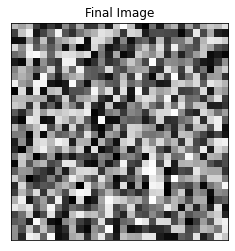

In [38]:
def show_image(img, title='', save=False, name=''):
    '''
    a function for showing images
    
    Parameters:
    -------------
    
    img: (numpy.ndarray) input image
    
    title: (str, optional) title of the image
    
    save: (bool, optional) if you want to save figure make this True
    
    name: (str, optional) name of the image you want to save
    
    '''
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    if save:
        iio.imwrite(name, img)
    plt.show()
    
    
def encode_image(img, m):
    '''
    This function encode an image with golomb code
    
    Parameter:
    -------------
    
    img: (numpy.ndarray) input image
    
    m: (int) parameter of golomb code
    
    Returns:
    -------------
    
    code: (list) a list contains coded bits
    '''
    
    arr = img.flatten() # flat the image
    code = []
    for i in range(len(arr)):
        code += golomb_encode(arr[i], m)
        
    return code


def decode_image(code, m):
    '''
    This function decode a list with golomb code
    
    Parameter:
    -------------
    
    code: (list) list contains bits of coded image
    
    m: (int) parameter of golomb code
    
    Returns:
    -------------
    
    img: (numpy.ndarray) output image
    '''
    img = []
    k = np.log2(m)
    
    if k == int(k): # if m=2^k
        k = int(k)
        while len(code)>0:
            ind = code.index(0)
            img.append(golomb_decode(code[0:ind+k+1], m))
            code = code[ind+k+1:]
            
    else:
        k = int(np.ceil(k))
        c = 2**k - m
        while len(code)>0:
            ind = code.index(0)
            unary = code[0:ind+1] # unary part
            binary = code[ind+1:ind+k] # assume binary code has k-1 bits
            l = ind + k
            r = int(''.join(list(map(str, binary))), 2)
            if not 0 <= r < c: # binary code has k bits
                binary = code[ind+1:ind+k+1]
                l += 1
            img.append(m*unary_decode(unary)+binary_decode(m, binary)) # decoding
            code = code[l:]
            
    
    return np.array(img).reshape((n, n))



n = 30 # dimension of random image
m = 80 # parameter of the coding
img = np.random.randint(256, size=(n, n))
show_image(np.uint8(img), title='Original Image', save=True, name='original_image.jpg')
coded = encode_image(img, m)
decoded = decode_image(coded, m)
show_image(np.uint8(img), title='Final Image', save=True, name='final_image.jpg')